## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [257]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt   

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn import metrics

In [258]:
Stud_df = pd.read_csv('students-data.csv',header=0,delimiter=';')

In [259]:
print(Stud_df.head(10))

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...  

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [260]:
# setting 'number'as index for the dataframe
Stud_df.index.set_names('number',inplace=True)

In [261]:
#checking for total null values
Stud_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

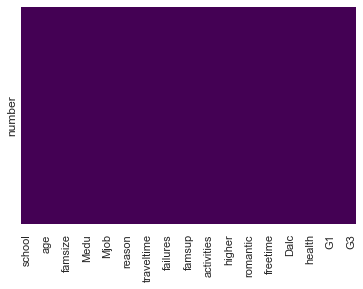

In [262]:
#checking gaps in data using heatmap.
sns.heatmap(Stud_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The heatmap doesnt show any gaps, so there are no null values in the data set.

In [263]:
#checking if any NAN value exist
Stud_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [265]:
#summary stats of the dataset
Stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [266]:
Stud_df.describe().transpose

<bound method DataFrame.transpose of               age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [267]:
#printing categorical variables
print(Stud_df.select_dtypes(include=['object']))

       school sex address famsize Pstatus      Mjob      Fjob      reason  \
number                                                                      
0          GP   F       U     GT3       A   at_home   teacher      course   
1          GP   F       U     GT3       T   at_home     other      course   
2          GP   F       U     LE3       T   at_home     other       other   
3          GP   F       U     GT3       T    health  services        home   
4          GP   F       U     GT3       T     other     other        home   
5          GP   M       U     LE3       T  services     other  reputation   
6          GP   M       U     LE3       T     other     other        home   
7          GP   F       U     GT3       A     other   teacher        home   
8          GP   M       U     LE3       A  services     other        home   
9          GP   M       U     GT3       T     other     other        home   
10         GP   F       U     GT3       T   teacher    health  reputation   

In [268]:
#making a copy of original dataset
Stud_df_orig=Stud_df
Stud_df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [269]:
# computing the variance of numerical columns
Stud_df_var=Stud_df.select_dtypes(include=['number']).var()

In [270]:
# filter those rows whose variance < 1
Stud_df_var1=Stud_df_var[Stud_df_var.values < 1]

In [271]:
# Drop the columns whose variance < 1
Stud_df.drop(Stud_df[Stud_df_var1.index],axis=1,inplace=True)

In [272]:
# transformed dataset
print(Stud_df.head(10))

       school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
number                                                                 
0          GP   F   18       U     GT3       A     4     4   at_home   
1          GP   F   17       U     GT3       T     1     1   at_home   
2          GP   F   15       U     LE3       T     1     1   at_home   
3          GP   F   15       U     GT3       T     4     2    health   
4          GP   F   16       U     GT3       T     3     3     other   
5          GP   M   16       U     LE3       T     4     3  services   
6          GP   M   16       U     LE3       T     2     2     other   
7          GP   F   17       U     GT3       A     4     4     other   
8          GP   M   15       U     LE3       A     3     2  services   
9          GP   M   15       U     GT3       T     3     4     other   

            Fjob  ... higher internet romantic goout Walc health absences  G1  \
number            ...                                 

In [273]:
Stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

Answer:

In [276]:
#Encoding Categorical data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Stud_df=Stud_df.apply(LabelEncoder().fit_transform)

In [277]:
print(Stud_df.head(10))


        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0    3        1        0        0     4     4     0     4   
1            0    0    2        1        0        1     1     1     0     2   
2            0    0    0        1        1        1     1     1     0     2   
3            0    0    0        1        0        1     4     2     1     3   
4            0    0    1        1        0        1     3     3     2     2   
5            0    1    1        1        1        1     4     3     3     2   
6            0    1    1        1        1        1     2     2     2     2   
7            0    0    2        1        0        0     4     4     2     4   
8            0    1    0        1        1        0     3     2     3     2   
9            0    1    0        1        0        1     3     4     2     2   

        ...  higher  internet  romantic  goout  Wal

In [278]:
Stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int64
sex           395 non-null int64
age           395 non-null int64
address       395 non-null int64
famsize       395 non-null int64
Pstatus       395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int64
Fjob          395 non-null int64
reason        395 non-null int64
guardian      395 non-null int64
schoolsup     395 non-null int64
famsup        395 non-null int64
paid          395 non-null int64
activities    395 non-null int64
nursery       395 non-null int64
higher        395 non-null int64
internet      395 non-null int64
romantic      395 non-null int64
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtyp

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [279]:
# converting column G1 values into boolean pass(1) and fail(0) values
Stud_df['G1'] = np.where(Stud_df['G1'] < 10,0,1)

In [280]:
# converting column G2 values into boolean pass(1) and fail(0) values
Stud_df['G2'] = np.where((Stud_df['G2'] < 10),0,1)

In [281]:
# converting column G3 values into boolean pass(1) and fail(0) values
Stud_df['G3'] = np.where((Stud_df['G3'] < 10),0,1)

In [282]:
print(Stud_df.head(10))

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0    3        1        0        0     4     4     0     4   
1            0    0    2        1        0        1     1     1     0     2   
2            0    0    0        1        1        1     1     1     0     2   
3            0    0    0        1        0        1     4     2     1     3   
4            0    0    1        1        0        1     3     3     2     2   
5            0    1    1        1        1        1     4     3     3     2   
6            0    1    1        1        1        1     2     2     2     2   
7            0    0    2        1        0        0     4     4     2     4   
8            0    1    0        1        1        0     3     2     3     2   
9            0    1    0        1        0        1     3     4     2     2   

        ...  higher  internet  romantic  goout  Wal

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [283]:
#splitting into X and Y
X=Stud_df.drop('G3',axis=1)
Y=Stud_df.pop('G3')

In [284]:
print(X)
print(Y)

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0    3        1        0        0     4     4     0     4   
1            0    0    2        1        0        1     1     1     0     2   
2            0    0    0        1        1        1     1     1     0     2   
3            0    0    0        1        0        1     4     2     1     3   
4            0    0    1        1        0        1     3     3     2     2   
5            0    1    1        1        1        1     4     3     3     2   
6            0    1    1        1        1        1     2     2     2     2   
7            0    0    2        1        0        0     4     4     2     4   
8            0    1    0        1        1        0     3     2     3     2   
9            0    1    0        1        0        1     3     4     2     2   
10           0    0    0        1        0        1 

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

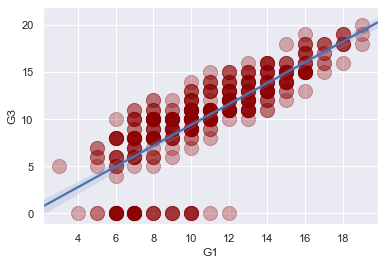

In [285]:
#G1 and G3 plot with the original dataset
sns.regplot(x=Stud_df_orig["G1"], y=Stud_df_orig["G3"],scatter_kws={"color":"darkred","alpha":0.3,"s":200})

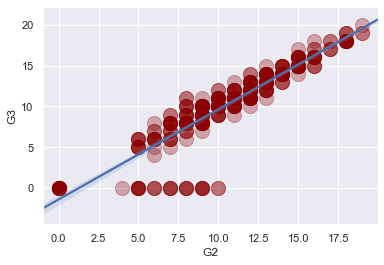

In [286]:
#G2 and G3 plot with the original dataset
sns.regplot(x=Stud_df_orig["G2"], y=Stud_df_orig["G3"],scatter_kws={"color":"darkred","alpha":0.3,"s":200})

G2 and G3 have a very strong positive correlation when compared to G1 and G3. Therefore,G2 can be a better predictor of G3 than G1 as the correlation is strong.


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

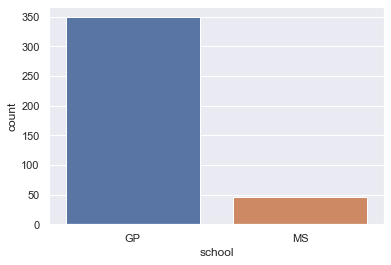

In [287]:
sns.countplot(x=Stud_df_orig['school'])

In [ ]:
#Most of the student belong to GP school

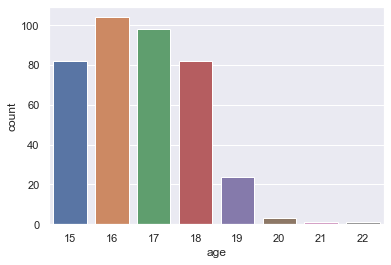

In [288]:
sns.countplot(x=Stud_df_orig['age'])

Most of the students are of age 16 years

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [290]:
test_size = 0.24 # taking 300 records in training set
seed = 4  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [291]:
# Fit and predcit using logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.968421052631579
[[69  2]
 [ 1 23]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [292]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [293]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.95


In [294]:
# make predictions on Test dataset 
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.92      0.96      0.94        24

    accuracy                           0.97        95
   macro avg       0.95      0.97      0.96        95
weighted avg       0.97      0.97      0.97        95

[[69  2]
 [ 1 23]]


Final Presdictions on Test dataset:Out of the total # of students passed i.e 70, the model predicted 1 failed student as passed(Type I error). Out of the total # of students that failed, the model predicted 2 passed students as failed(Type II error).The model accuracy score in this case is 97 % i.e 97% times the predictions will be correct.

In [295]:
# make predictions on training dataset
expected = y_train
predicted = model.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       193
           1       0.94      0.91      0.92       107

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300

[[187   6]
 [ 10  97]]


Final Presdictions on Train dataset:Out of the total # of students that passed i.e 197, the model predicted 10 failed student as passed(Type I error). Out of the total # of students that failed i.e 103, the model predicted 6 passed students as failed(Type II error).The model accuracy score in this case is 95 % i.e 95% times the predictions will be correct.

# Naive bayes with Iris data

### Import Iris.csv

In [296]:
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [308]:
Iris_df = pd.read_csv('Iris.csv',header=0)

In [298]:
print(Iris_df.head(10))

   Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                   5.1                  3.5                   1.4   
1                   4.9                  3.0                   1.4   
2                   4.7                  3.2                   1.3   
3                   4.6                  3.1                   1.5   
4                   5.0                  3.6                   1.4   
5                   5.4                  3.9                   1.7   
6                   4.6                  3.4                   1.4   
7                   5.0                  3.4                   1.5   
8                   4.4                  2.9                   1.4   
9                   4.9                  3.1                   1.5   

   Petal width (in cm)        Class  
0                  0.2  Iris-setosa  
1                  0.2  Iris-setosa  
2                  0.2  Iris-setosa  
3                  0.2  Iris-setosa  
4                  0.2  Iris-setosa  
5

In [299]:
#dataset summary information
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [309]:
# creating a copy of the original dataset
Iris_df_orig=Iris_df
Iris_df_orig

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [305]:
#splitting dataset into X and Y
X=Iris_df.drop('Class',axis=1)
Y=Iris_df.pop('Class')

In [306]:
print(X)
print(Y)

     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6                   1.4   
5                     5.4                  3.9                   1.7   
6                     4.6                  3.4                   1.4   
7                     5.0                  3.4                   1.5   
8                     4.4                  2.9                   1.4   
9                     4.9                  3.1                   1.5   
10                    5.4                  3.7                   1.5   
11                    4.8                  3.4                   1.6   
12                    4.8                  3.0                  

### Find the distribution of target variable (Class)

In [310]:
Iris_df_orig.groupby(['Class']).count()
#all the classes are equally distributed.

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

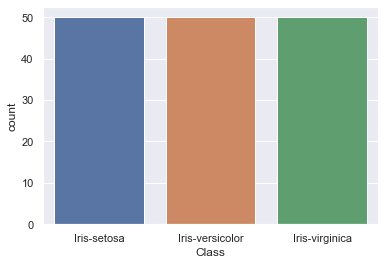

In [311]:
sns.countplot(x=Y)

All classes are equally distributed.

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

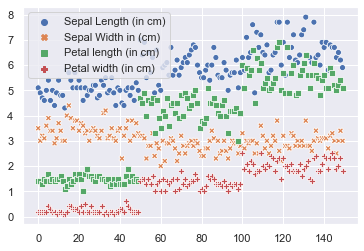

In [312]:
#Scatter plot on all the predictors
sns.scatterplot(data=X)

### Summary Statistics and explain insights for at least 2 variables

In [313]:
#summary stats of the predictors
X.describe().transpose

<bound method DataFrame.transpose of        Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
count            150.000000           150.000000            150.000000   
mean               5.843333             3.054000              3.758667   
std                0.828066             0.433594              1.764420   
min                4.300000             2.000000              1.000000   
25%                5.100000             2.800000              1.600000   
50%                5.800000             3.000000              4.350000   
75%                6.400000             3.300000              5.100000   
max                7.900000             4.400000              6.900000   

       Petal width (in cm)  
count           150.000000  
mean              1.198667  
std               0.763161  
min               0.100000  
25%               0.300000  
50%               1.300000  
75%               1.800000  
max               2.500000  >

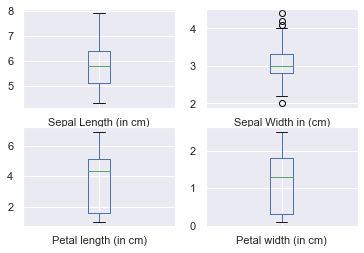

In [314]:
Iris_df_orig.plot(kind='box', subplots=True, layout=(2,2))
plt.show()

The box plot shows 'Sepal length' and 'Sepal Width' attributes are almost a normal distributions. Also, 'Sepal Width' attribute has few outliers. The attributes 'Petal Length' and 'Petal width' are both right skewed distributions.

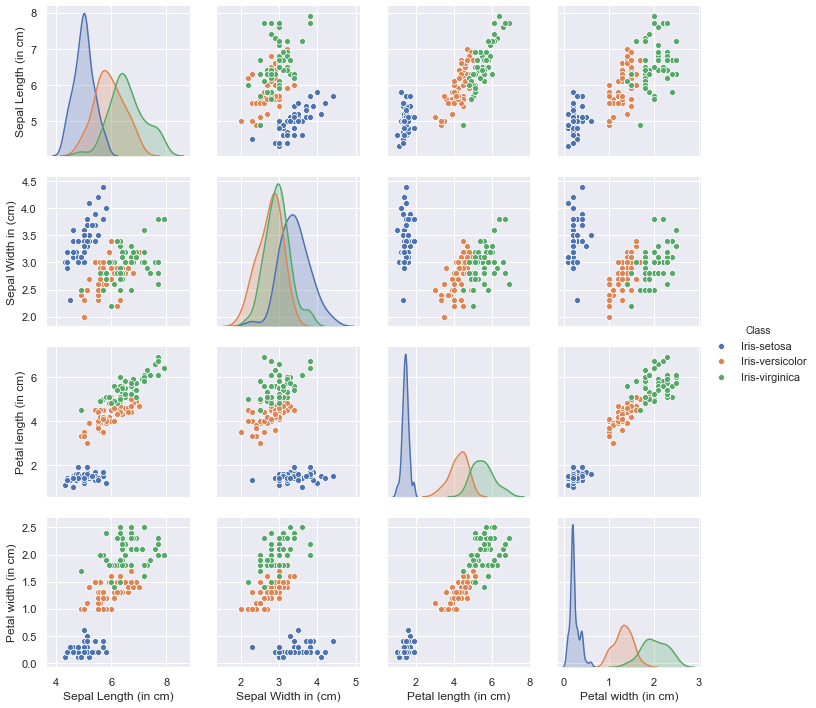

In [315]:
sns.pairplot(Iris_df_orig[['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)', 'Petal width (in cm)', 'Class']],hue='Class')


As per the pair plot above,
In the attribute-'Sepal Legth', there is some amount of overlap between the 3 classes. The overlap is much higher between versicolor and virginica than setosa. 
In the attribute-'Sepal Wigth', there is a good  amount of overlap between the 3 classes.
In the attribute-'Petal Length', there is a good  amount of overlap between versicolor and virginica but no overlap with setosa at all.
In the attribute-'Petal width', there is a good  amount of overlap between versicolor and virginica but no overlap with setosa at all.

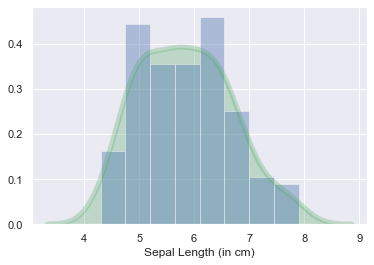

In [316]:
sns.distplot( a=Iris_df_orig["Sepal Length (in cm)"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True })

Sepal lenth attribute is amlost a normal distribution where most of the values are either of length 5 cms or 6.5 cms. There are 2 peaks.

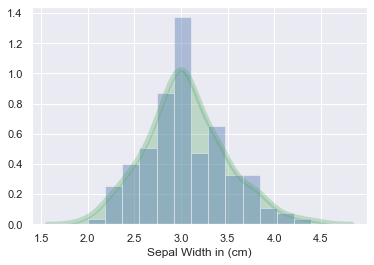

In [317]:
sns.distplot( a=Iris_df_orig["Sepal Width in (cm)"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True })

Sepal width is very close to a normal distribtion with maximum number of values at 3 cms.

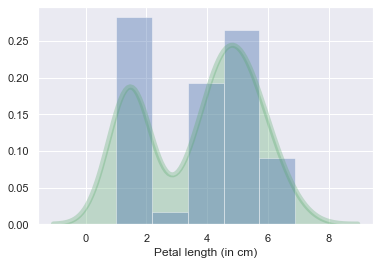

In [318]:
sns.distplot( a=Iris_df_orig["Petal length (in cm)"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True })

Petal Length attribute has 2 peaks, one at 1 cm and the other at 5 cms respectively. 

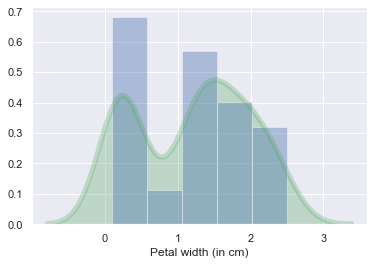

In [319]:
sns.distplot( a=Iris_df_orig["Petal width (in cm)"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True })

Petal width attribute also has 2 peaks, one at 0.6 cm aand other at 0.575 cms(approx).

### Correlation among all variables and give your insights

In [320]:
#correlation matrix of all the variables
X.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


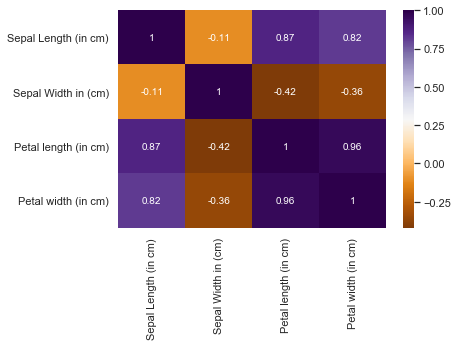

In [321]:
# Calculate correlation between each pair of variable
corr_matrix=X.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='PuOr',annot=True)
#sns.plt.show()


Among all the four attributes, 'Sepal Width' is an independant attribute as it is correlation cooeffients are very small with the rest of the attributes. The attribute 'Sepal Length' is strongly correlated with attributes 'Petal length' and 'Petal Width'. The 'Petal length' and 'Petal Width' are very strongly correlated with a coefficient as close to 1. 

### Split data in Training and Validation in 80:20

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Do Feature Scaling

In [323]:
from sklearn.preprocessing import StandardScaler 

In [324]:
#scale all X using StandardScaler
scaler = StandardScaler() 
  # To scale data 
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Train and Fit NaiveBayes Model

In [325]:
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [326]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score of test data:', accuracy_score(y_test, predictions))

Accuracy score of test data: 0.9666666666666667


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


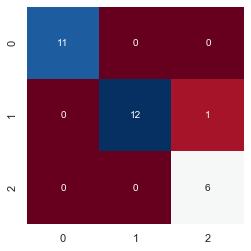

In [327]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False)

The model predicts on test dataset for "Iris-Setosa" with 100% precision.  For class "Iris-versicolor", it predicted 12 values correctly but 1 value is misclassified as  from class "Iris-versicolor". Its predicted correctly all the values belonging to "Iris-Virginica". The overall prediction accuracy of the model is 97%.